<hr style="height:2px;border:none" />
<h1><center> Engineering Tripos Part IIA Module Experiment: 3C6 </center></h1> 
<h1><center> Digital Vibration Analysis, South Wing Mechanics Laboratory </center></h1>
<hr style="height:2px;border:none" />

## Objectives

-  To investigate alternative methods of determining calibrated frequency response transfer functions of a mechanical vibrating system, using a digital measuring system;
-   To predict the response of a system from measured responses of its decoupled subsystems, and to compare with the measured response of the coupled system.

## Introduction

Problems involving vibration occur in every area of mechanical engineering, such as wave loading of offshore platforms, cabin noise in aircraft, performance of machine tools, and design of loudspeakers. To tackle such problems, one generally needs a combination of theoretical modelling and measurement. Theoretical modelling may take the form of simple analytical calculations, but is more likely to involve computer packages (for example to perform finite-element calculations).

Most vibration measurements also involve computers. A force of some kind is applied to the structure, and signals corresponding to this driving force and the response of the structure are sampled at regular intervals using an analogue-to-digital converter, so that they are represented in the computer by vectors of discrete values. This operation is usually described as “data-logging”. These sampled signals can then be processed to yield frequency response functions, vibration resonance frequencies, damping factors, mode shapes, and other more complicated quantities such as fatigue life predictions. The fundamental building block in any such analysis is the transfer function between a force applied at one point on the structure and the response (displacement, velocity or acceleration) at another point. The main approaches to the determination of vibration transfer functions are illustrated in this experiment.

_Note on jargon: a confusing array of different names is used to describe such transfer functions. We will use “(mechanical) admittance”, based on an analogy between mechanical and electrical systems. This is defined to be the ratio of velocity response to force, at a given frequency. Velocity is the natural response variable for many purposes, because it is the “energy conjugate” of force — force times velocity at the driven point gives the rate of doing work, just as does voltage times current. Another common name for admittance is “mobility”._

## Apparatus

The apparatus comprises a mechanical vibrating system, actuators to apply controlled forces to it, a sensor to measure the response, a data-logging computer with analysis software, and some miscellaneous electronic instrumentation. The vibrating system consists of two flexible cantilever beams, fixed to a heavy base. The base rests on soft rubber feet, to minimise the pick-up of background vibration transmitted through the floor and bench. An electromagnetic shaker (moving-coil actuator, constructed like a normal loudspeaker) can be coupled to the lower beam using a magnetic attachment. The two beams may be coupled together by wedging a small brass rod between the two beams. There is enough contact pressure to ensure that the beams remain in good contact for the purposes of vibration transmission.

Force can also be applied to the structure impulsively, using an instrumented hammer. This has a piezoelectric force transducer built into it, so that the precise waveform of force can be determined. The signal from this transducer is buffered by a suitable charge amplifier. The hammer has a soft tip which has the effect of limiting the frequency content of the impulse to a maximum of about 800Hz. The charge amplifiers used in this experiment have a low-frequency cutoff of 8 Hz. This makes vibration measurement easier by rapidly removing any DC drift or offset.

Vibration response is measured using an accelerometer mounted on a magnetic base. It can be placed on the top or bottom beam as required. The signal from the accelerometer passes through a charge amplifier, and is then integrated by analogue circuitry to produce an output proportional to velocity at the measurement point. In this experiment the accelerometer should always be placed as near as possible to the point on the structure at which the driving force is applied — this is achieved by placing it on the opposite side to the force-application point, in line with it. In this way, all your measurements will be of driving-point admittance.

Signals corresponding to the force and the velocity response go to the PC, which is used to perform data logging and analysis via a Python package, which this notebook uses. The person who logs in will hold all saved files. Make sure your file quota is not near its limit before you begin! If the power is not on at the benches, turn on the switches on the pillar at the north end of the bench, labelled “computers” and “bench sockets”. You may need to plug in the two BNC cables carrying your input and output signals to the diecast box at the rear of the computer trolley. Your cables are labelled “3C6 CH1” and “3C6 CH2”, to be plugged into the corresponding channels.

Magnets are not really the best way to attach accelerometers to a structure. As in this experiment they can be very convenient, but they have two major disadvantages. Firstly, the contact force is quite small (compared with a bolted or glued connection) and this causes problems if the acceleration levels are high. The second problem is that heavy magnets should not be used on light structures since the added mass will seriously modify the vibration characteristics of the structure, at the very least by lowering natural frequencies. You will observe this effect in this experiment and you should comment on it.

***
__When using the magnets make sure they are well seated. If they are not, you will hear buzzing or rattling. Remove the magnet and wipe both surfaces with your finger to remove any grit. Moving the magnet slightly is often all that is needed to get rid of the buzz. If the buzz persists, try using a lower vibration level.__
***

## Experimental procedure

For the first part of the experiment you will explore the frequency response of the cantilever system using a sine-wave generator, much as you did in the Part IA vibration experiment. The computer will be used only to collect the results and plot them. Attach the shaker to the bottom beam using the magnetic connector and insert the brass coupling rod between the two beams if it is not already there. Attach the accelerometer to the top beam directly above the coupling rod. Set the selector switch to “Sine”. Now go to the computer. On the Desktop double click on the “Matlab” icon, to launch the Matlab environment. When the Matlab Command Window appears, type “sinesweep” there and press “Enter”. A window will appear, allowing data points to be measured and plotted. Now use the sine-wave generator to explore the system response in the frequency range 0–500 Hz. For each frequency tested, watch the oscilloscope display to be sure that the vibration has settled to a steady state, then click the “Measure” button on the computer. The input and output signals will be sampled, and a dot will be plotted on the screen showing the corresponding value of the admittance function. As is usual in vibration measurements, the results are plotted with a logarithmic vertical scale, in decibels (dB). Actually the admittance function is complex (or equivalently each value has a phase shift associated with it), and what is plotted here is the magnitude of the admittance.

You can explore up and down in frequency at will, until you have dotted out a reasonable picture of the admittance (you should find at least four resonance peaks). Unwanted data points can be deleted using the “Delete last point” button. Be particularly careful to catch the peak values, where the system has resonances. You need not print the results at this stage: a better opportunity will arise later, when you will be able to print these results superimposed on other measurements of the admittance. When you have gathered sufficient data points, click on the "Save and quit" button, and the program will prompt for a file name, save your results and terminate. You don’t need to plot the results at this stage, you will read your results back in later and plot them then.

__Any files you save during this experiment should be put in your own file space on the central computer network: this space is mounted as the drive z: when you logged in to the Teaching System. Do not put files on the local disk of the PC you are using. Make sure you avoid file names containing a dot! Windows doesn’t like them.__

Start by importing the necessary modules (pydvma is a python package written for data acquisition at CUED).

Remember:

* to actually run a cell of code, click inside the cell then press 'shift+enter'
* the cell is running while [ * ] is displayed
* the cell has finished running when it changes to a number

In [1]:
%gui qt5

In [2]:
import pydvma as dvma
import lab_3c6
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12,'font.family':'serif'})
import ipywidgets as widgets
from IPython.display import display

In [3]:
matplotlib.use('nbagg')

### Stepped sine test

Choose your acquisition settings. The settings for this part of the 3C6 lab are:

* channels=2 (number of channels to record)
* fs=3000 (sampling rate in Hz)
* chunk_size=100 (how many samples to collect at a time, effectively controls refresh rate of oscilloscope)
* stored_time=1 (time in seconds to record data for)
* viewed_time=1 (time in seconds to display on oscilloscope)
* device_driver = 'nidaq'
* device_index = 0

In [4]:
# acquisition setup
settings = dvma.MySettings(channels=2,
                           fs=3000,
                           chunk_size=100,
                           stored_time=0.5,
                           viewed_time=0.5,
                           device_driver = 'soundcard',
                           device_index=1)

Now open an oscilloscope using your settings. This shows three plots:

* the top one is like a normal oscilloscope showing the signal (toggle on/off with 'T');
* the middle one shows the frequency spectrum of the signal (toggle on/off with 'F');
* the bottom one shows the signal amplitudes (toggle on/off with 'L');

In [ ]:
# open oscilloscope
osc = dvma.Oscilloscope(settings)

In this part of the lab we want to measure the gain and phase shift from input to output at the specific frequencies of the generator.

In [ ]:
# log data

lab_3c6.measure_stepped_sine(osc.rec)

Store and save data as DataSet object:

In [ ]:
data_stepped_sine = dvma.load_data()

In [ ]:
a.lstrip

In [ ]:
# process and view
data_stepped_sine=dvma.load_data()
dvma.PlotData(data_stepped_sine)

### Noise input

The sine-wave method of obtaining the admittance, as you will now know, is laborious and not particularly accurate unless considerable care is taken. An improvement is to employ a forcing signal which contains the whole range of frequencies simultaneously, and to use Fourier analysis to sort out both the input and output signals into frequency components, and thus to obtain the transfer function. One kind of forcing signal which has a broad range of frequency components is random noise. Switch to “Noise” on the selector, and you will hear the sound of the cantilever system responding to such a signal, generated by an analogue noise generator.

You can bring up the oscilloscope at any time using:

In [ ]:
osc = dvma.Oscilloscope(settings)

We will explore the effect of some different logging options: first change the settings to store 2 seconds of data, and start logging:

In [ ]:
# acquisition setup
settings.stored_time = 2
data_noise_2s = dvma.log_data(settings)
dvma.save_data(data_noise_2s)

Next try logging 30 seconds of data:

In [ ]:
# log data
settings.stored_time = 30
data_noise_30s = dvma.log_data(settings)
dvma.save_data(data_noise_30s)


In [ ]:
data_stepped_sine = dvma.load_data()
data_noise_2s = dvma.load_data()
data_noise_30s = dvma.load_data()

These datasets contain the raw time-series data. We can calculate the FFT and the transfer functions as follows:

In [ ]:
data_noise_2s.calculate_fft_set(window=True)
data_noise_2s.calculate_tf_set()

data_noise_30s.calculate_fft_set(window=True)
data_noise_30s.calculate_tf_set()

Plot the datasets and compare:

In [ ]:
dvma.PlotData(data_noise_2s.tf_data_list)

In [ ]:
dvma.PlotData(data_noise_30s.tf_data_list)

To smooth out the transfer functions we can average the data: recall that the transfer function is given by:

$$G(\omega) = \frac{E[YX^*]}{E[XX^*]}$$

where $X$ and $Y$ are the FFTs of the input and output respectively, and $E[\cdot]$ denotes the expectation (or average). If we take the whole time series then no averages are taken. But we can split the time data into sections (or 'frames'), calculate the FFT of each frame, then take the averages of those.

Use the interactive slider below to explore the effect of changing the number of frames:

In [ ]:
# Load 3c6 widget
lab_3c6.test_num_frames(data_noise_30s.time_data_list[0])

Plot the cases N_frames=1, N_frames=30, and the choice of N_frames that you think gives the best data.

In [ ]:
tf_data1 = dvma.calculate_tf(data_noise_30s.time_data_list[0], N_frames=1)
dvma.PlotData(tf_data1)

In [ ]:
tf_data = dvma.calculate_tf(data_noise_30s.time_data_list[0], N_frames=30)
dvma.PlotData(tf_data2)

In [ ]:
tf_data3 = dvma.calculate_tf(data_noise_30s.time_data_list[0], N_frames=2)
dvma.PlotData(tf_data3)

In [ ]:
data_noise_30s.add_to_dataset([tf_data1,tf_data2,tf_data3])
print(data_noise_30s)

In [ ]:
data_noise_30s.save_data()

### Hammer input

There is an entirely different kind of forcing signal which contains a broad range of frequencies. This arises if you excite the structure impulsively with a short pulse. This could be done using the shaker, but it is more naturally done using a hammer. Remove the magnet and rod which attaches the shaker to the beams, then move the accelerometer to the underneath of the beams to the position where this coupling was previously attached. Switch the selector to “Hammer”. 

In [ ]:
# acquisition setup
settings.stored_time = 6
settings.pretrig_samples = 100

You can now capture the response of the system to a gentle tap with the instrumented hammer: tap on the top of the beams vertically above the accelerometer. Provided you tap within 20 s of starting logging, the computer will detect the moment when your input signal (the hammer force) exceeds a threshold value, and it will automatically save the signal starting just before this moment, by the 200 samples specified by the pretrigger variable.

__Data will be collected by the computer for 6 s: hold the hammer still until it is finished, and don’t put it down on the bench.__

__Check your hammer impulse in the time-domain display window. Is it clipped? Was there a single, clean impact or multiple impacts? Be prepared to practice your tapping technique until you get good results. Don't proceed until you've got a single clean impulse. Was there any vibration before the impulse? Make sure the beams were not still vibrating from a previous impulse. Did you hear any rattling or buzzing sounds? Try a lighter tap.__

In [ ]:
data_hammer_single = dvma.log_data(settings)

The data logger converts voltages in the range $\pm 5$ V into discrete levels with 16-bit accuracy. If the sampled numbers, which are in Volts, are much less than about 0.5 V, then some useful dynamic range has been wasted. But if 5 V is actually achieved, then the signal has been clipped. This will produce nonlinearity in the frequency response. The program will warn you if either signal is clipped: repeat the measurement if so.

Before looking at the transfer function, it is always prudent to examine the time signals of both input and output, and you should do this. If you zoom in on the time signals, you will see the individual samples. Examine the hammer pulse in detail: find out how long it is, and comment in your write-up on what governs this length, and what influence it might have on the transfer function. Examine the signals, both input and output, before the hammer strike. They are probably slightly non-zero: are there different reasons for the input and the output?

In [ ]:
dvma.PlotData(data_hammer_single.time_data_list)

Next, calculate frequency spectra with the FFT option, and look at the spectra of input and output signals. What governs the form of the input spectrum? What force spectrum would you expect from an ideal impulse? Why does the spectrum tail off at high frequencies? Why does it tail off at low frequencies? 

In [ ]:
data_hammer_single.calculate_fft_set(window=False)

In [ ]:
dvma.PlotData(data_hammer_single.freq_data_list)

Obtain a transfer function to compare with those obtained by the earlier methods. You should find that the result is satisfactory, with sharp clear peaks and troughs, without any need for averaging. If it is not, try again. You may have to develop your hammering technique a little to obtain best results. If you find it hard to get a clean transfer function then try moving the magnet, and checking that the brass coupling rod between the beams is well seated. It takes very little time to repeat the impulse response procedure. __You will find the write-up much easier with good data.__

In [ ]:
data_hammer_single.calculate_tf_set(window=None)

In [ ]:
dvma.PlotData(data_hammer_single.tf_data_list)

In [ ]:
dvma.save_data(data_hammer_single)

Try measuring an averaged transfer function using the hammer, as you did with the random noise excitation. You should find that just two or three hammer taps are sufficient to produce excellent coherence in the frequency range up to 500 Hz.

1 Microphone Array (Realtek High 
Selected device: 1 : Microphone Array (Realtek High 

Logging data for 0.5 seconds

Logging complete.


<IPython.core.display.Javascript object>


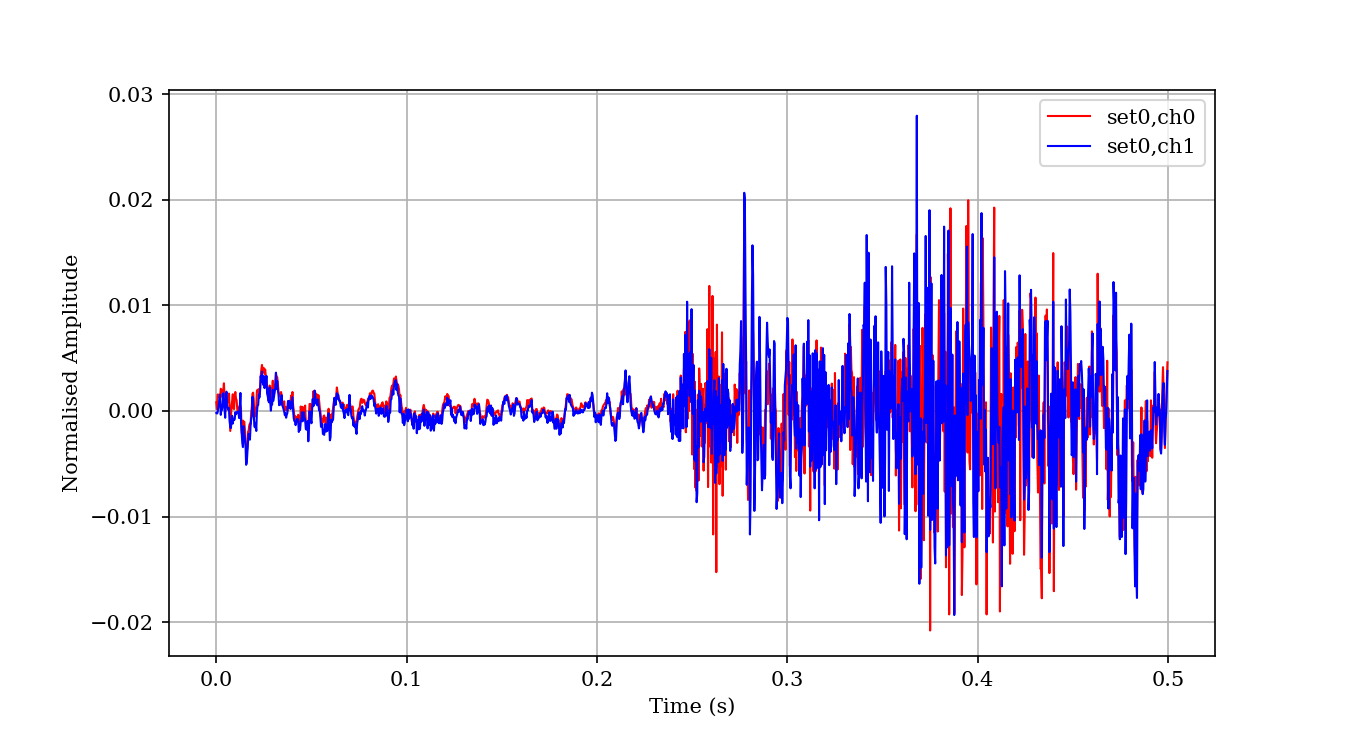

[0, 1]
1 Microphone Array (Realtek High 
Selected device: 1 : Microphone Array (Realtek High 

Logging data for 0.5 seconds

Logging complete.


<IPython.core.display.Javascript object>


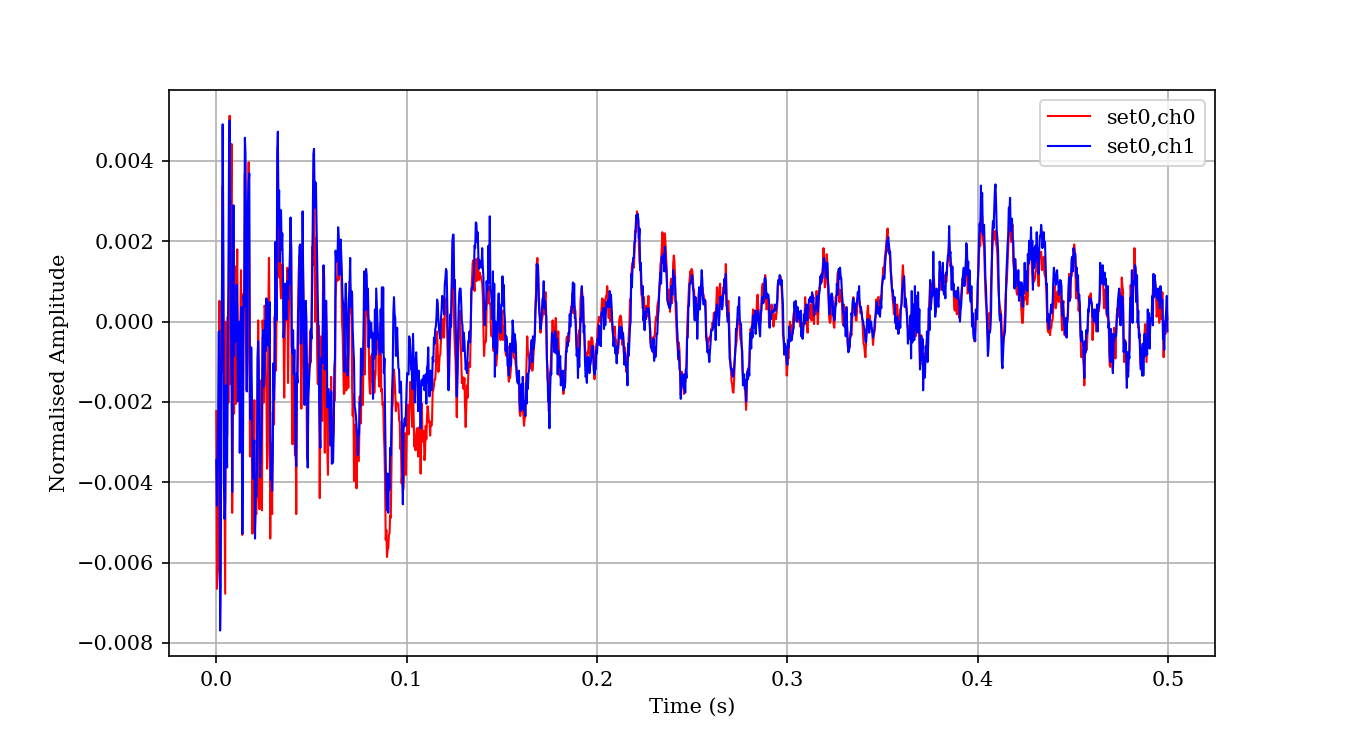

[0, 1]


<IPython.core.display.Javascript object>


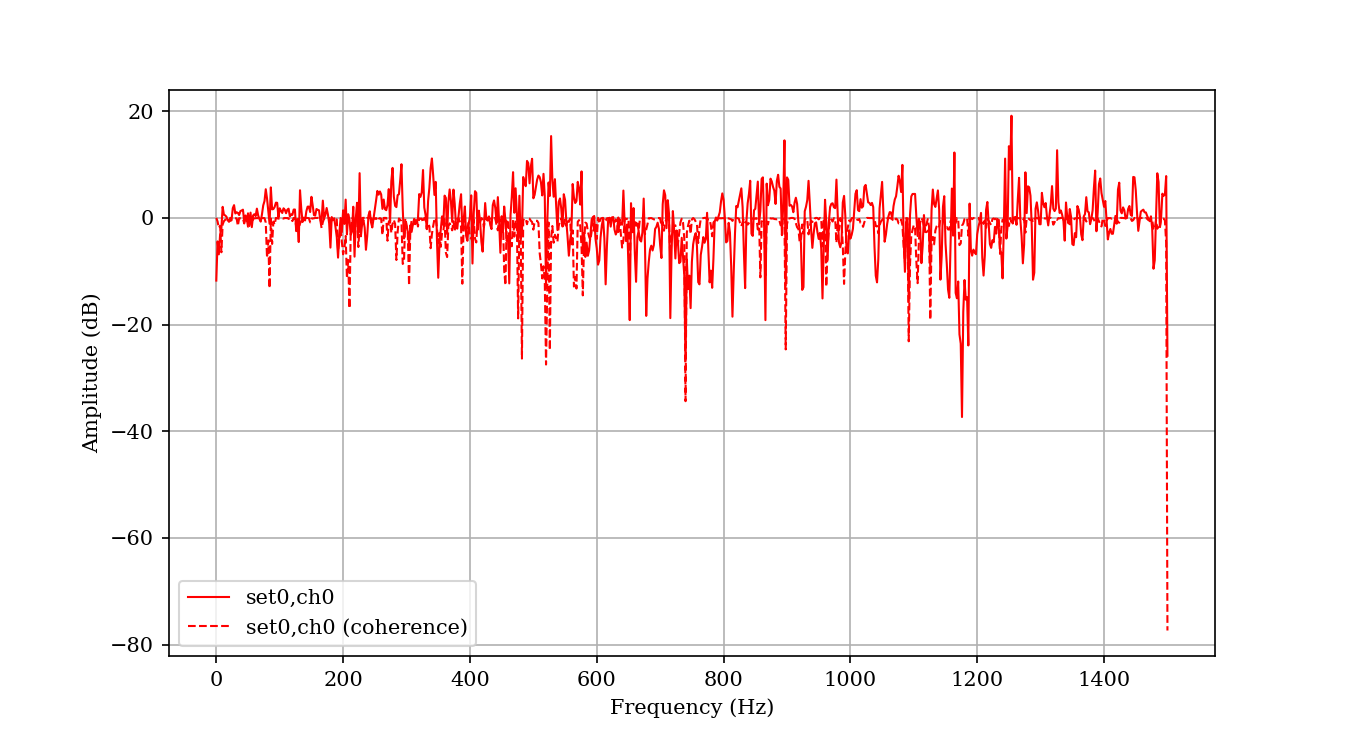

In [5]:
# load the 3c6 measurement widget
lab_3c6.log_tf_with_average(settings)

Now calculate the averaged transfer functions across the set of measurements:

In [ ]:
data_hammer_set.calculate_tf_averaged(window=None)

In [ ]:
dvma.save_data(data_hammer_set)

Now create a new dataset that contains the transfer functions from your previous measurements, and plot your results.

In [ ]:
data_all = dvma.DataSet()
data_all.add_to_dataset(data_stepped_sine.tf_data_list)
data_all.add_to_dataset(data_noise_30s.tf_data_list)
data_all.add_to_dataset(data_hammer_set.tf_data_list)
tf_plot = dvma.PlotData(data_all)

The most obvious difference should be that the hammer results are shifted vertically relative to the noise results. This is because the two input signals need different calibration factors. The computer can calculate an appropriate scale factor which would allow the peaks in the noise results to be scaled to fit those from the hammer: adjust the display window so that it shows a frequency range around the biggest two or three peaks, then 

In [ ]:
factors = dvma.best_match(data_all.tf_plot_list, freq_range=None,n_ref=2)

use the option “Best match of 2 chans”. Find the Matlab Command Window, and it will show the answer. Use the option “Scale/calibrate” to apply this factor to the shaker signal.
Now compare the results from the three measurement methods. Use the option “Superimpose sine sweep results”, specifying the same scaling factor as just determined for the noise measurements. The three methods should now show good agreement at all the resonance peaks. You should see that there are one or more resonance peaks at low frequency in the admittance functions when measured using the hammer, but not when measured using the shaker. Can you explain why? Hint: notice that the shaker force is applied between the cantilevers and the base. Why is the hammer force different? What is the consequence?

### Calibration

The final stage of the measurement is to calibrate your transfer functions to give results in physical
units. Move the accelerometer to the suspended mass behind the cantilevers. Use the hammer to
measure a good transfer function of this mass, swinging in a straight line. Log several measurements. Newton’s law
tells us that this transfer function should be very simple: the force should equal the mass times the
acceleration, and the mass (weight plus accelerometer) is given on a label on the apparatus: approximately 0.3 kg.

In [ ]:
data_calibration_set = dvma.DataSet()

words = ['Measure', 'Undo last']
buttons = [widgets.Button(description=w) for w in words]
display(widgets.HBox(buttons))

def measure(b):
    global data_calibration_set
    d = dvma.log_data(settings)
    data_calibration_set.add_to_dataset(d.time_data_list)
    
def undo(b):
    global data_calibration_set
    data_calibration_set.remove_last_data_item('TimeData')

buttons[0].on_click(measure)
buttons[1].on_click(undo)

Your measured transfer function relates to velocity rather than acceleration,
so it must be converted. In the frequency domain, all that is needed is to multiply each point of the
transfer function by $i\omega$, using the appropriate angular frequency.

In [ ]:
data_calibration_set.calculate_tf_averaged(window=None)
tf_data = data_calibration_set.tf_data_list[0]
tf_data_acc = dvma.mutliply_by_power_of_iw(tf_data,1)
data_calibration_set.add_to_dataset(tf_data_acc)

Plot the transfer function: it should now show a near-horizontal line over a range of frequencies. Make your
best estimate of the value of this constant level: to convert the decibal value back to a linear value note that

$$Y_\text{dB} = 20 \log_{10} \left|Y_\text{linear}\right|$$

Hence deduce the factor by which the measured transfer function must be multiplied in order to give a
calibrated result: apply this factor to the data from the mass to verify that your procedure is correct.

In [ ]:
data_hammer_single.tf_data_list[0].channel_cal_factors = [4]

Now apply this factor (and where needed, the factor found in section 4.3) to convert the results
of all three measurements into calibrated units. Save or print the resulting graph, as the culmination
of this part of the experiment. What are the units of this calibrated admittance?

In [ ]:
dvma.PlotData(tf_data_acc)

In [ ]:
data_hammer.calibrate_data([0.0018])

dva.plot(data_hammer.transferFunction)
dva.plot(data_noise.transferFunction)

factor = dva.best_match(data_hammer.freqData,data_noise.freqData, freqrange = [150,250])
data_noise.calibrate_data(factor)
data_steppedsine.calibrate_data(factor)

### 3 way comparison

In [ ]:
dva.plot(data_steppedsine.transferFunction)
dva.plot(data_noise.transferFunction)
dva.plot(data_hammer.transferFunction)

### Coupling

In [ ]:
settings = dvm.setup(labsettings = "3c6",
                     preTrig = 200,
                     trigThreshold = 0.5,
                     logTime = 6,
                     Naverages = 1) # change input settings ready for hammer
td = dvm.logdata(settings, testname = "lower beam") # returns time data
data_lower_beam = dva.newDataSet(td)

In [ ]:
td = dvm.logdata(settings, testname = "upper beam") # returns time data
data_upper_beam = dva.newDataSet(td)

In [ ]:
coupled_TF = 1/(data_upper_beam.transferFunction + data_lower_beam.transferFunction)

In [ ]:
dva.plot(data_hammer.transferFunction)
dva.plot(coupled_TF)